
Analyzing digit 0


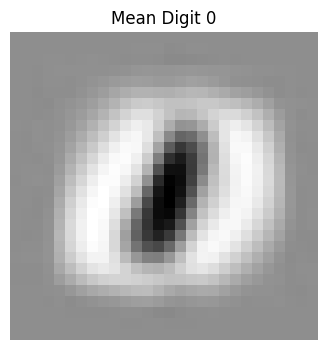

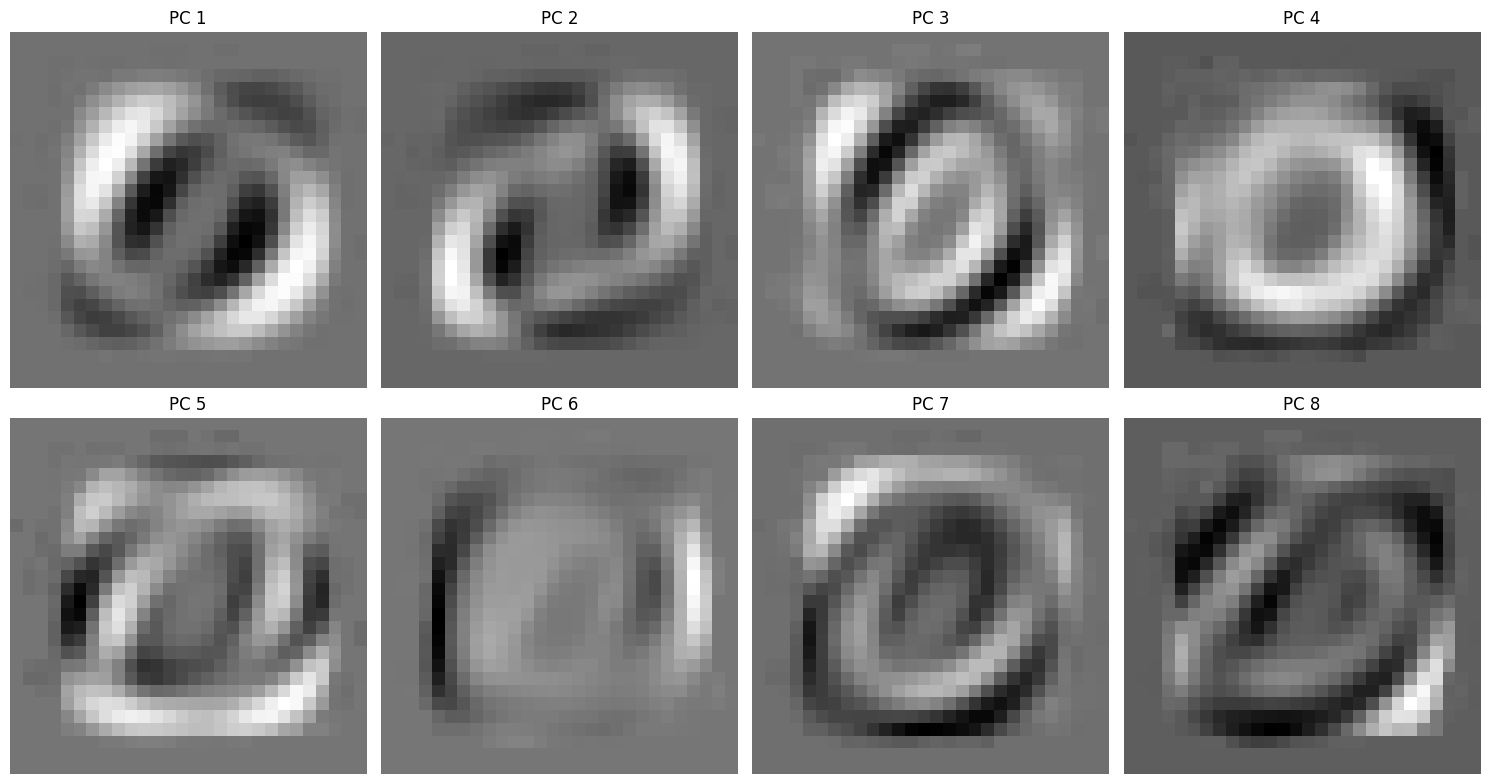

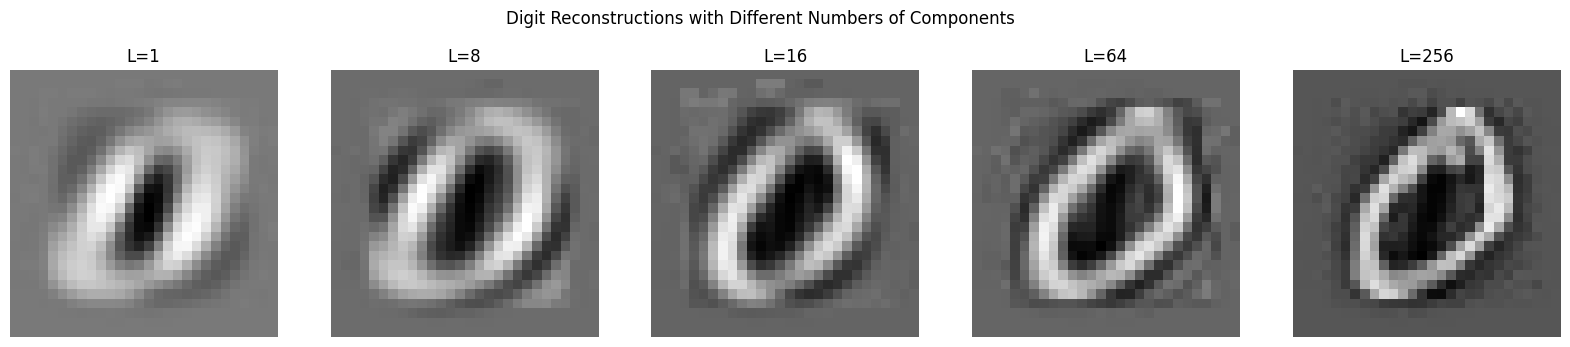

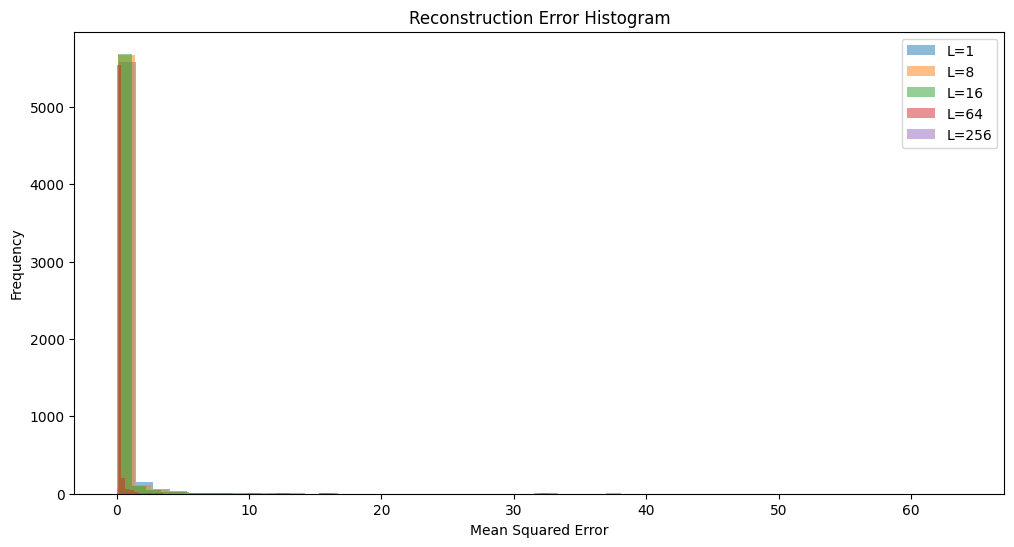


Analyzing digit 1


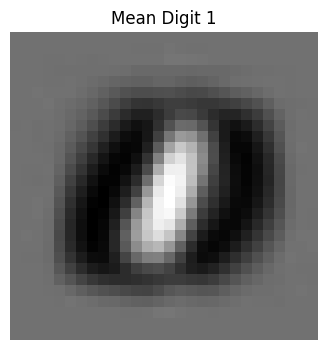

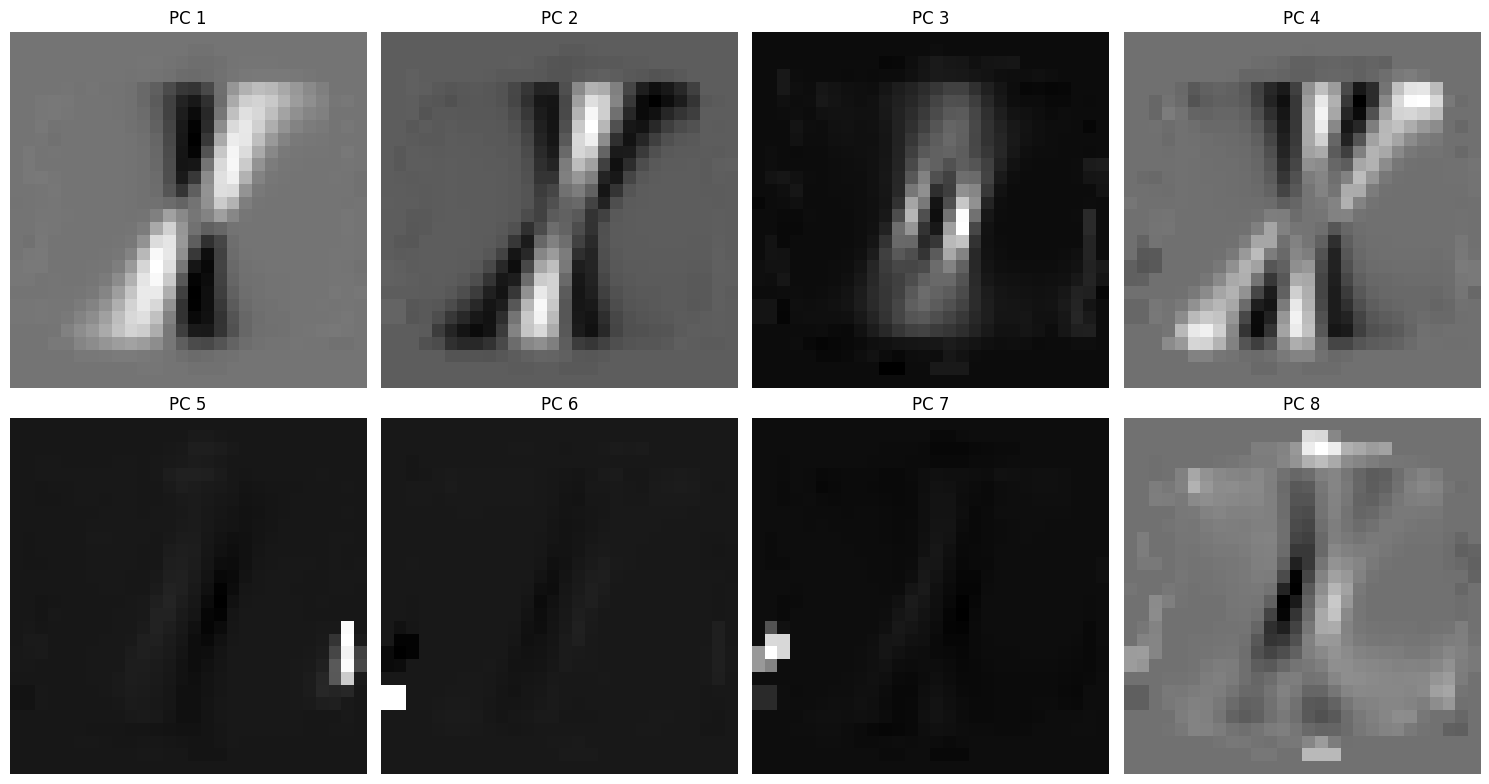

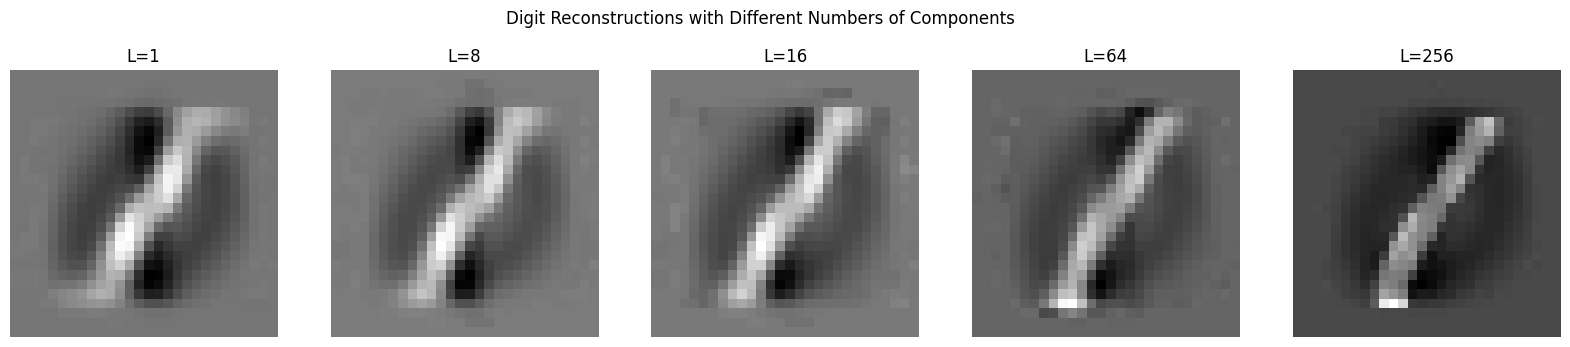

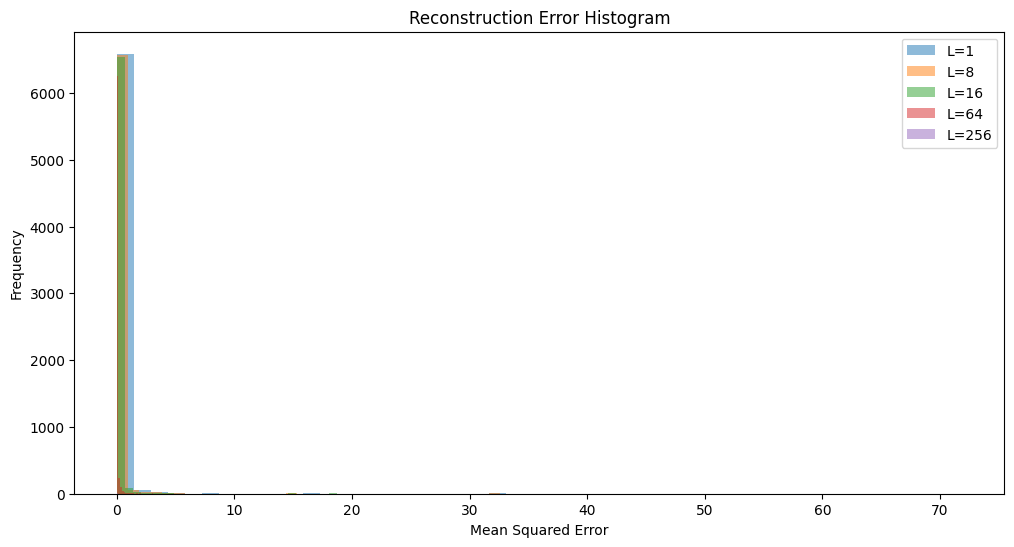

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def load_and_preprocess_data(train_path, test_path, selected_digits=[0, 1]):
    # Load data
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)

    # Separate labels and features
    X_train = train_data.drop('label', axis=1).values
    y_train = train_data['label'].values
    X_test = test_data.drop('label', axis=1).values
    y_test = test_data['label'].values

    # Filter selected digits
    train_mask = np.isin(y_train, selected_digits)
    test_mask = np.isin(y_test, selected_digits)

    X_train_filtered = X_train[train_mask]
    y_train_filtered = y_train[train_mask]
    X_test_filtered = X_test[test_mask]
    y_test_filtered = y_test[test_mask]

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_filtered)
    X_test_scaled = scaler.transform(X_test_filtered)

    return X_train_scaled, y_train_filtered, X_test_scaled, y_test_filtered

def calculate_mean_digit(X, y, digit):
    digit_data = X[y == digit]
    return np.mean(digit_data, axis=0)

def calculate_covariance_matrix(X):
    return np.cov(X.T)

def plot_digit(data, title):
    plt.figure(figsize=(4, 4))
    plt.imshow(data.reshape(28, 28), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_principal_components(pca_components, n_components=8):
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()

    for idx in range(n_components):
        axes[idx].imshow(pca_components[idx].reshape(28, 28), cmap='gray')
        axes[idx].axis('off')
        axes[idx].set_title(f'PC {idx+1}')

    plt.tight_layout()
    plt.show()

def reconstruct_and_plot(X, pca, dimensions, digit_idx=0):
    fig, axes = plt.subplots(1, len(dimensions), figsize=(20, 4))
    original = X[digit_idx]

    for idx, dim in enumerate(dimensions):
        pca_dim = PCA(n_components=dim)
        X_transformed = pca_dim.fit_transform(X)
        X_reconstructed = pca_dim.inverse_transform(X_transformed)
        reconstructed_digit = X_reconstructed[digit_idx]

        axes[idx].imshow(reconstructed_digit.reshape(28, 28), cmap='gray')
        axes[idx].axis('off')
        axes[idx].set_title(f'L={dim}')

    plt.suptitle('Digit Reconstructions with Different Numbers of Components')
    plt.show()

def plot_error_histogram(X, pca, dimensions):
    plt.figure(figsize=(12, 6))

    for dim in dimensions:
        pca_dim = PCA(n_components=dim)
        X_transformed = pca_dim.fit_transform(X)
        X_reconstructed = pca_dim.inverse_transform(X_transformed)

        reconstruction_errors = np.mean((X - X_reconstructed) ** 2, axis=1)
        plt.hist(reconstruction_errors, bins=50, alpha=0.5, label=f'L={dim}')

    plt.xlabel('Mean Squared Error')
    plt.ylabel('Frequency')
    plt.title('Reconstruction Error Histogram')
    plt.legend()
    plt.show()

# Main analysis
def main():
    # Selected digits for analysis
    selected_digits = [0, 1]  # You can modify these digits

    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data('mnist_train.csv',
                                                               'mnist_test.csv',
                                                               selected_digits)

    # For each selected digit
    for digit in selected_digits:
        print(f"\nAnalyzing digit {digit}")

        # Calculate and plot mean digit
        mean_digit = calculate_mean_digit(X_train, y_train, digit)
        plot_digit(mean_digit, f'Mean Digit {digit}')

        # Calculate covariance matrix
        digit_data = X_train[y_train == digit]
        cov_matrix = calculate_covariance_matrix(digit_data)

        # Perform PCA and plot components
        pca = PCA(n_components=8)
        pca.fit(digit_data)
        plot_principal_components(pca.components_)

        # Plot reconstructions
        dimensions = [1, 8, 16, 64, 256]
        reconstruct_and_plot(digit_data, pca, dimensions)

        # Plot error histograms
        plot_error_histogram(digit_data, pca, dimensions)

if __name__ == "__main__":
    main()